In [1]:
import pandas as pd
import networkx as nx
from networkx.algorithms import bipartite
from collections import Counter
import matplotlib.pyplot as plt
from itertools import combinations

In [2]:
df = pd.read_table('JumboWorld.txt')
print(df)

       Family             Hotel               Park       Day
0       Smith        Tusk Hotel      Jumbo Kingdom    Friday
1       Smith        Tusk Hotel      Jumbo Kingdom  Saturday
2       Smith        Tusk Hotel       World's Fair    Sunday
3     Johnson     Mammoth Motel      Jumbo Studios    Friday
4     Johnson     Mammoth Motel      Jumbo Kingdom  Saturday
...       ...               ...                ...       ...
2995     Noel    Elephant Lodge  Animal Planet Zoo  Saturday
2996     Noel    Elephant Lodge      Jumbo Studios    Sunday
2997     Vang  Pachyderm Suites      Jumbo Studios    Friday
2998     Vang  Pachyderm Suites       World's Fair  Saturday
2999     Vang  Pachyderm Suites  Jumbo Golf Course    Sunday

[3000 rows x 4 columns]


## Question1

In [3]:
G1 = nx.from_pandas_edgelist(df, "Family", "Park")
park_list = df["Park"].tolist()
park_list = [*set(park_list)]
A1 = nx.to_pandas_adjacency(G1, None, dtype=int)
A1 = A1[park_list]
A1 = A1.drop(park_list, axis=0)
A1.to_csv("p1.csv")

In [4]:
print(A1[park_list].sum())

World's Fair         583
Jumbo Golf Course    185
Animal Planet Zoo    334
Jumbo Studios        561
Trunk Water Park     272
Jumbo Kingdom        676
dtype: int64


## Question2

In [5]:
df_woday = df.drop(["Day"], axis=1)
df_woday = df_woday.drop_duplicates()
df_HotelPark = df_woday.groupby(['Hotel', 'Park']).size().reset_index()
df_HotelPark.rename(columns={0:'number'}, inplace=True)
# print(df_HotelPark)

In [6]:
G2 = nx.from_pandas_edgelist(df_HotelPark, "Hotel", "Park", ["number"])

A2 = nx.to_pandas_adjacency(G2, None, weight='number', dtype=int)
A2 = A2[park_list]
A2 = A2.drop(park_list, axis=0)
A2.to_csv("p2.csv")
# print(A2)

True


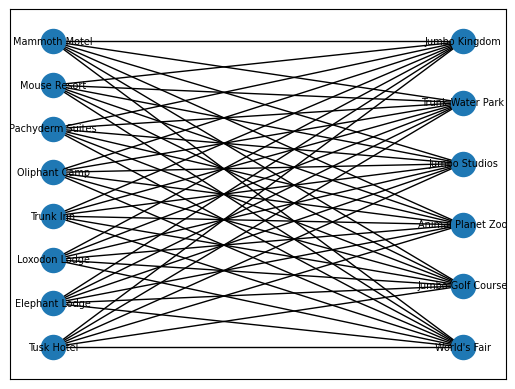

In [7]:
print(bipartite.is_bipartite(G2))
top = nx.bipartite.sets(G2)[0]
pos = nx.bipartite_layout(G2, top)

nx.draw_networkx(G2, pos = pos, with_labels = True, font_size = 7)
# nx.draw_networkx_edge_labels(G2,pos)

## Question3

In [8]:
def family_visit(df, park1, park2):
    family_list1 = set(df.loc[df["Park"] == park1]["Family"].to_list())
    family_list2 = set(df.loc[df["Park"] == park2]["Family"].to_list())
    
    return list(set(family_list1) & set(family_list2))

In [9]:
park_pairlist = list(combinations(park_list, 2))
G3 = nx.Graph()
G3.add_nodes_from(df["Family"], bipartite = 0)
G3.add_nodes_from(df["Family"], bipartite = 1)
for pair in park_pairlist:
    family_list = family_visit(df, pair[0], pair[1])
    family_pairlist = list(combinations(family_list, 2))
    for family_pair in family_pairlist:
        G3.add_edge(family_pair[0], family_pair[1])

In [10]:
A3 = nx.to_pandas_adjacency(G3, None, dtype=int)
A3.to_csv("p3.csv")
# print(A3)

## Question 4

In [11]:
day_list = set(df['Day'].tolist())
print(day_list)

{'Friday', 'Sunday', 'Saturday'}


In [18]:
def if_family_visit_atsameday(df, park1, park2):
    family_list1 = set(df.loc[df["Park"] == park1]["Family"].to_list())
    family_list2 = set(df.loc[df["Park"] == park2]["Family"].to_list())
    
    return list(set(family_list1) & set(family_list2))

In [ ]:
park_pairlist = list(combinations(park_list, 2))
G4 = nx.Graph()
G4.add_nodes_from(df["Family"], bipartite = 0)
G4.add_nodes_from(df["Family"], bipartite = 1)
for day in day_list:
    for pair in park_pairlist:
        family_list = family_visit(df, pair[0], pair[1])
        family_pairlist = list(combinations(family_list, 2))
        for family_pair in family_pairlist:
            # TODO: whether the family visited the parks in same day
            day1_family1 = df[(df["Family"] == family_pair[0]) & (df["Park"] == pair[0])]["Day"].tolist()
            day1_family2 = df[(df["Family"] == family_pair[1]) & (df["Park"] == pair[0])]["Day"].tolist()
            day2_family1 = df[(df["Family"] == family_pair[0]) & (df["Park"] == pair[1])]["Day"].tolist()
            day2_family2 = df[(df["Family"] == family_pair[1]) & (df["Park"] == pair[1])]["Day"].tolist()
            if (list(set(day1_family1) & set(day1_family2)) != []) and \
                (list(set(day2_family1) & set(day2_family2)) != []):
                G4.add_edge(family_pair[0], family_pair[1])

In [15]:
# df1 = df[df['Day'] == 'Sunday']
# family_list1 = set(df1.loc[df1["Park"] == "Jumbo Kingdom"]["Family"].to_list())
# family_list2 = set(df1.loc[df1["Park"] == "Animal Planet Zoo"]["Family"].to_list())

# print(list(set(family_list1) & set(family_list2)))
test1 = df[(df["Family"] == "Smith") & (df["Park"] == "Jumbo Kingdom")]["Day"].tolist()
test2 = df[(df["Family"] == "Brown") & (df["Park"] == "Jumbo Kingdom")]["Day"].tolist()
print(list(set(test1) & set(test2)) != [])

True


In [16]:
A4 = nx.to_pandas_adjacency(G4, None, dtype=int)
A4.to_csv("p4.csv")
# print(A4)